In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statistics
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

In [58]:

plt.rcParams['figure.figsize'] = [15,6]

### Housing price Dataset
* This is housing price prediction dataset in USA where we are predicting and analyzing the monthly rental price of the houses 

In [59]:
data = pd.read_csv('housing.csv')
data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [60]:
data.shape

(384977, 22)

**We have 384977 rows and 22 columns in our dataset**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [62]:
data.drop(['id','url','region_url','image_url','description'],axis=1,inplace=True)

**We are dropping the above columns because it is unique**

In [63]:
data.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [64]:
(data['price']==0).value_counts()

False    383670
True       1307
Name: price, dtype: int64

In [65]:
(data['sqfeet']==0).value_counts()

False    384929
True         48
Name: sqfeet, dtype: int64

In [66]:
(data['beds']==0).value_counts()

False    373999
True      10978
Name: beds, dtype: int64

In [67]:
(data['baths']==0).value_counts()

False    381870
True       3107
Name: baths, dtype: int64

**Inference**

* **Price** column have 1307 rows with value as '0'. It means they are **living in a rent-free house or unentered data**.
* **Sqfeet** column have 48 rows with value as '0'. It means there are **48 houses with no zero space which doesn't even makes sense**.
* **Beds** column have 10978 rows with value as '0'. It means there are **10978 houses with no bedroom facility**.
* **Baths** column have 3107 rows with value as '0'. It means there are **3107 houses with no bathroom facility**.

In [68]:
data.describe(include='object')

,region,type,laundry_options,parking_options,state
count,384977,384977,305951,244290,384977
unique,404,12,5,7,51
top,jacksonville,apartment,w/d in unit,off-street parking,ca
freq,4246,318032,131783,128502,33085


**Inference**

* **Jacksoncille** is the region where people renting more houses.
* **Apartment** is highly preferred
* **wash and dry** in unit are mostly available in laundry options
* **California** is the state which is mostly preferred for house rental.

## Univariate Analysis

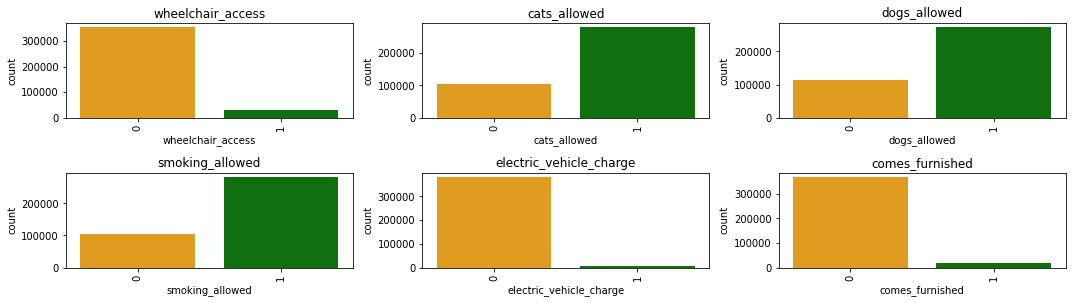

In [41]:
cols = ['wheelchair_access','cats_allowed','dogs_allowed','smoking_allowed', 'electric_vehicle_charge','comes_furnished']

rows =3
columns =3
iterator =1

for i in cols:
    plt.subplot(rows, columns, iterator)
    sns.countplot(data.loc[:, i],palette=['orange','green'])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [15]:
for i in cols:
    v=data[i].value_counts(normalize=True)
    print(v)

0    0.917889
1    0.082111
Name: wheelchair_access, dtype: float64
1    0.72689
0    0.27311
Name: cats_allowed, dtype: float64
1    0.707918
0    0.292082
Name: dogs_allowed, dtype: float64
1    0.731771
0    0.268229
Name: smoking_allowed, dtype: float64
0    0.987129
1    0.012871
Name: electric_vehicle_charge, dtype: float64
0    0.951872
1    0.048128
Name: comes_furnished, dtype: float64


**Inference**

**cats_allowed**
* The Proportion of cats allowed being True is more
* 72.68% of houses are allowing cats.

**dogs_allowed**
* There is 70.79% of data of the houses which are allowing dogs.
* The majority among dog_allowed is True.

**smoking_allowed**
* The Proportion of smoking allowed being True is more.
* 73.17% of houses are allowing smoking in their houses.

**wheelchair_access**
* There is 91.78% of data of the houses which are not having wheel chair access.
* The majority of houses are not having wheel chair facility.

**electric_vehicle_charge**
* The Proportion of electric vehicle charging point being available is less.
* 98.71% of houses are not having the facility for electric vehicle charging.

**comes_furnished**
* There is 95.18% of data of the houses which are not coming furnished .
* The minority of houses are furnished houses.

<AxesSubplot: xlabel='lat', ylabel='Density'>

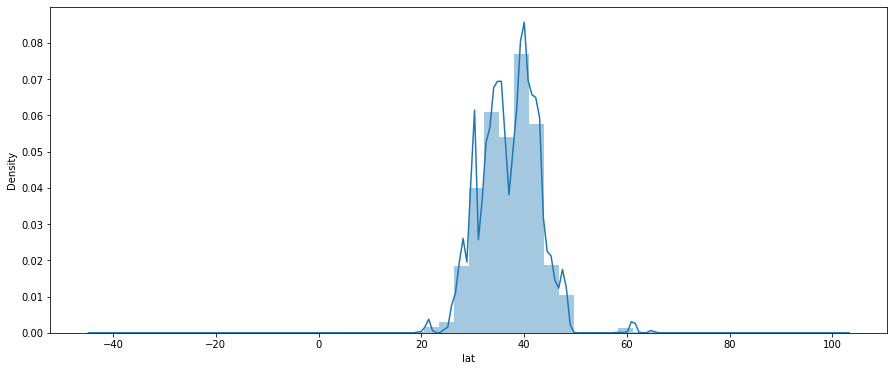

In [42]:
sns.distplot(data.lat)

In [17]:
data.lat.skew()

0.2538385064476199

* skewness is between 0 to 0.5 so it is normal

<AxesSubplot: xlabel='lat'>

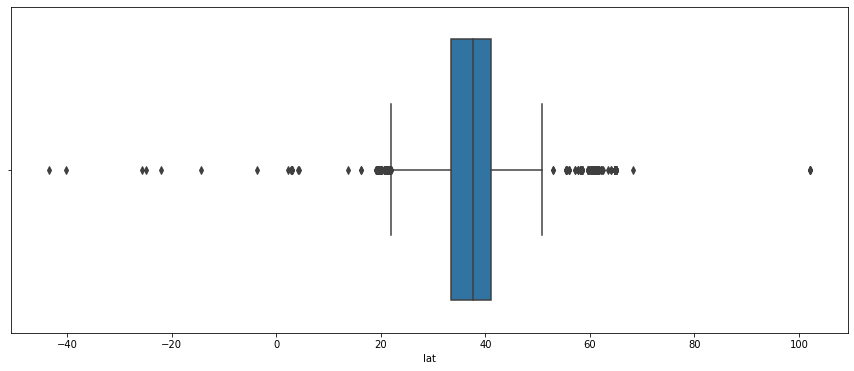

In [43]:
sns.boxplot(x=data['lat'])
# here we can see there are inliers as well as outliers

<AxesSubplot: xlabel='long', ylabel='Density'>

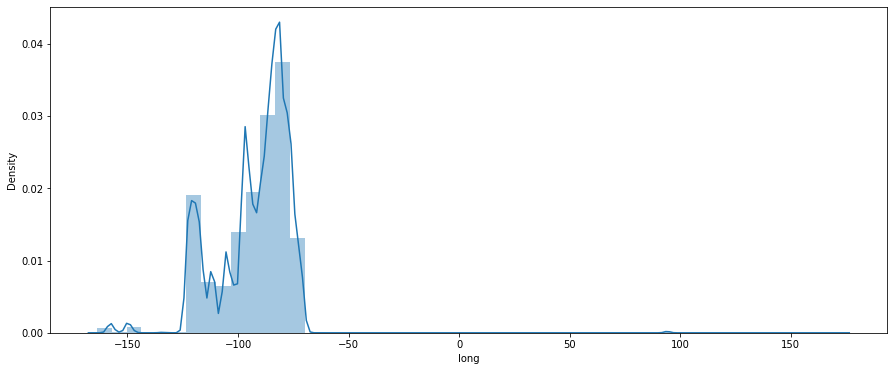

In [44]:
sns.distplot(data.long)

In [46]:
data.long.skew()

-0.04588833697185443

* the data is negatively skewed

<AxesSubplot: xlabel='long'>

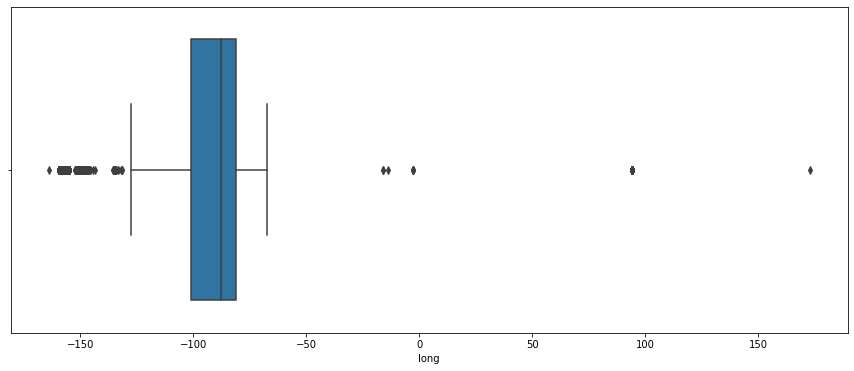

In [47]:
sns.boxplot(x=data['long'])
# there are extreme outliers

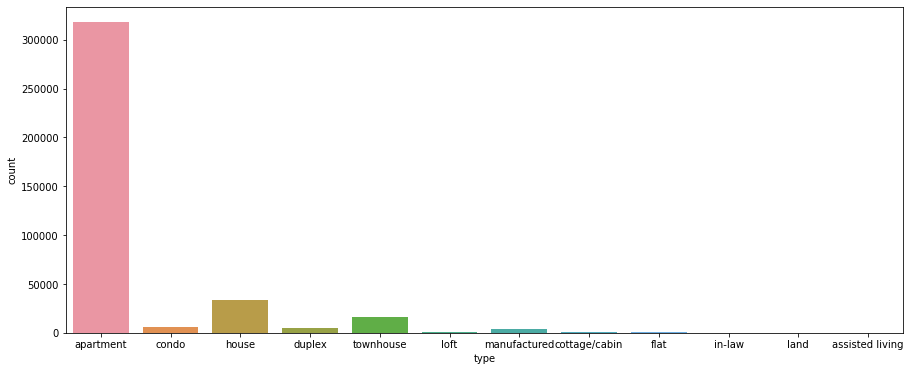

In [48]:
sns.countplot(data['type'])
plt.show()

**Inference**
* The houses for rent are mostly apartment.
* There are very low percentage of houses in assisted living category.

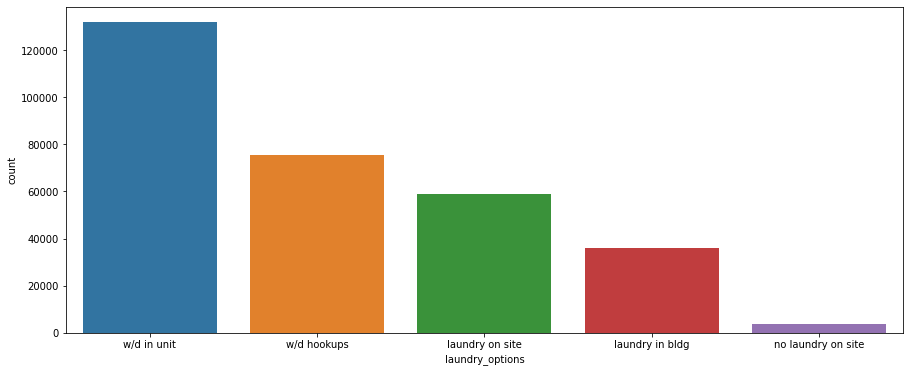

In [49]:
sns.countplot(data['laundry_options'])
plt.show()

**Inference**
* Most of the houses are having laundry facility.
* The maximum type of laundry is w/d in unit.
* There are very few percentage of houses(1.18%) with no laundry on site facility.

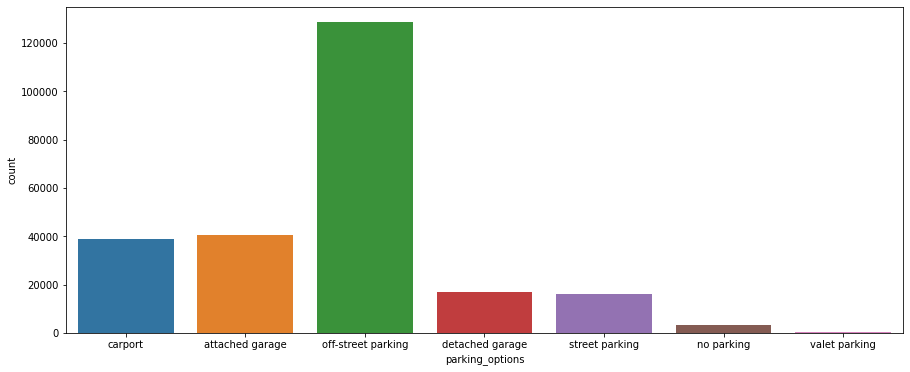

In [50]:
sns.countplot(data['parking_options'])
plt.show()

**Inference**
* Most of the houses are having parking facility. 
* Valet parking facility is very minimal.
* The majority of houses have Off-street parking facility.

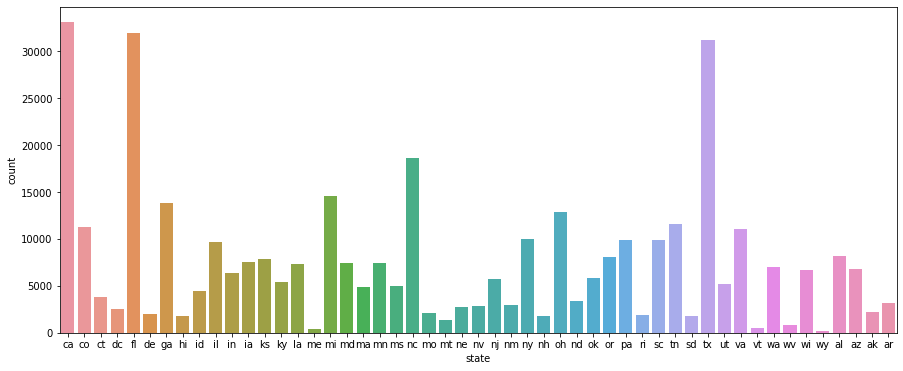

In [51]:
sns.countplot(data['state'])
plt.show()

**Inference**
* Most of the houses are avaible in CA(california state).
* Wyoming state has very less amount of rented houses.

## Bivariate Analysis

### Numerical vs Numerical (Target)

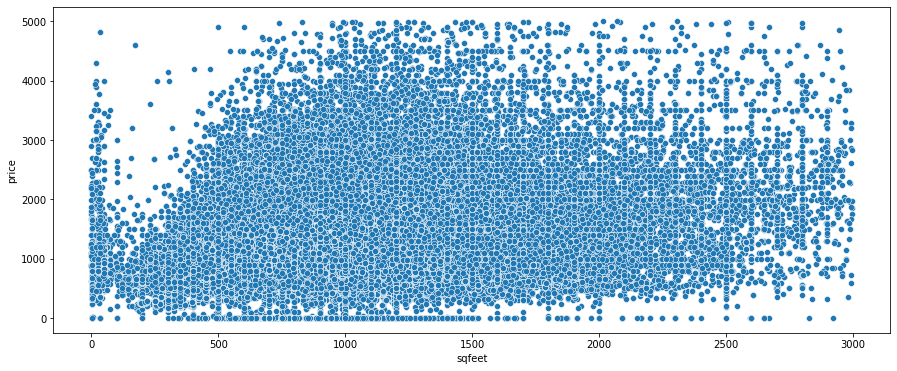

In [52]:
sns.scatterplot(data=data[(data['sqfeet']<3000)&(data['price']<5000)], x='sqfeet', y='price')
plt.show()

# Since both sqfeet and price one extreme as an outlier we are taking a range for this scatterplot

**Inference**
* We can see that sqfeet and the target variable does not have any linear relationship

<AxesSubplot: xlabel='beds', ylabel='price'>

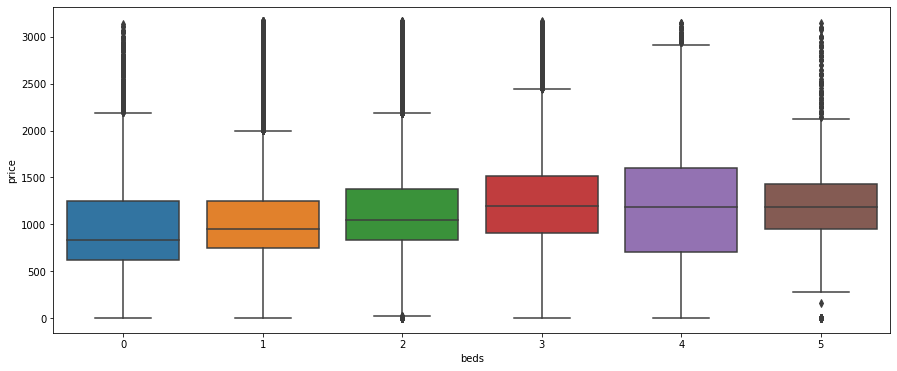

In [64]:
sns.boxplot(df['beds'], df['price'])

**Inference**
* For no bedroom to 2 bedrooms there is no much change in median value of the house price.
* From the boxplot we can see that when the number of bedrooms increases the median value of the house price also increases.
* 0-3 bedrooms have many outliers

<AxesSubplot: xlabel='baths', ylabel='price'>

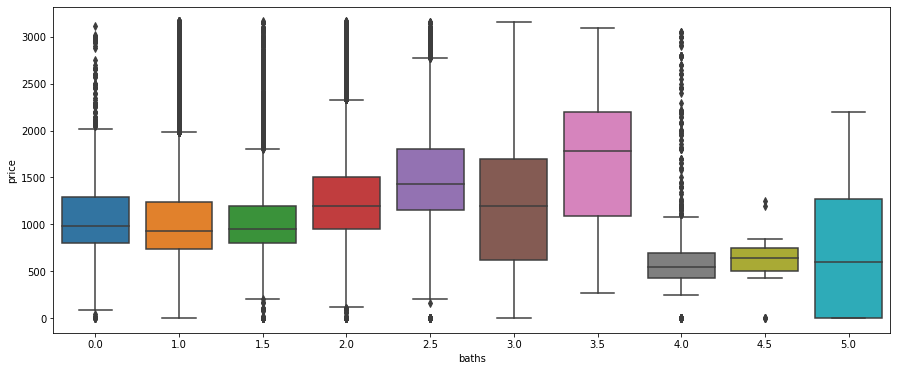

In [65]:
sns.boxplot(df['baths'], df['price'])

**Inference**
* Here 1.5 values in bathroom is two separate bathrooms, imagine one full bathroom, and elsewhere in the home is a half bath with a toilet and a sink. 
* 4.5 bathrooms have extreme outliers
* Here the no categories well separated from one other.

<AxesSubplot: xlabel='beds', ylabel='price'>

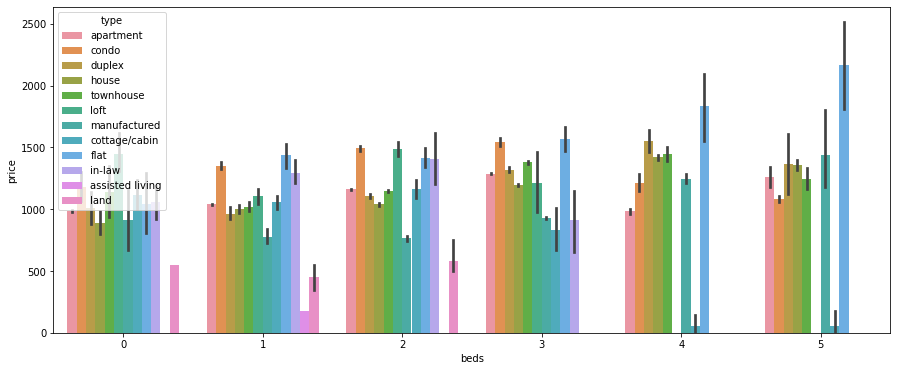

In [66]:
sns.barplot(df['beds'],df['price'],hue=df['type'])

**Inference**
* We can see that '0' bedrooms occured in every housing types, so we'll remove '0' bedrooms

<AxesSubplot: xlabel='beds', ylabel='sqfeet'>

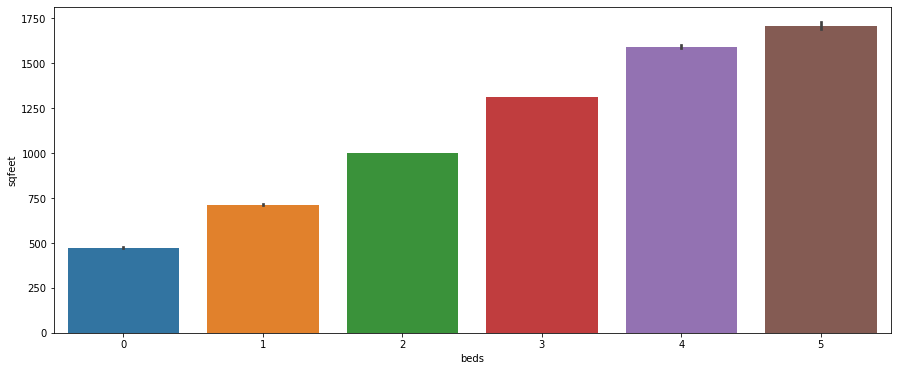

In [67]:
sns.barplot(df['beds'],df['sqfeet'])

**Inference**
* We can see that there is a linear relationship between beds and square feet

<AxesSubplot: xlabel='baths', ylabel='sqfeet'>

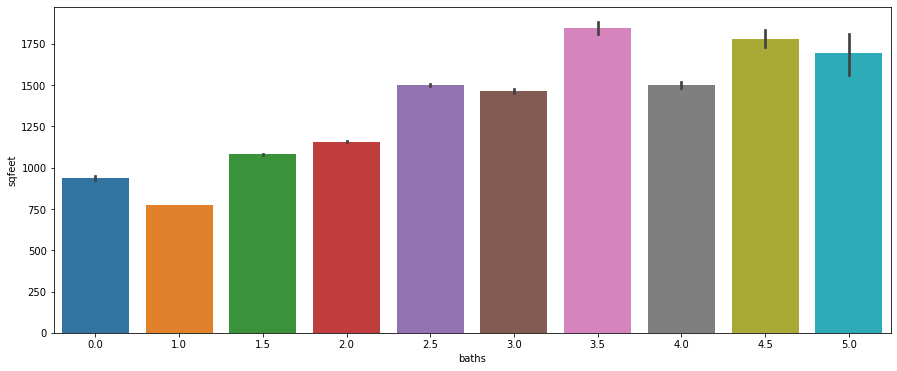

In [68]:
sns.barplot(df['baths'],df['sqfeet'])

**Inferencce**
* We can see that baths and square feet have no linear relationship but houses with 3.5 bathrooms are high.

### Categorical vs Numerical

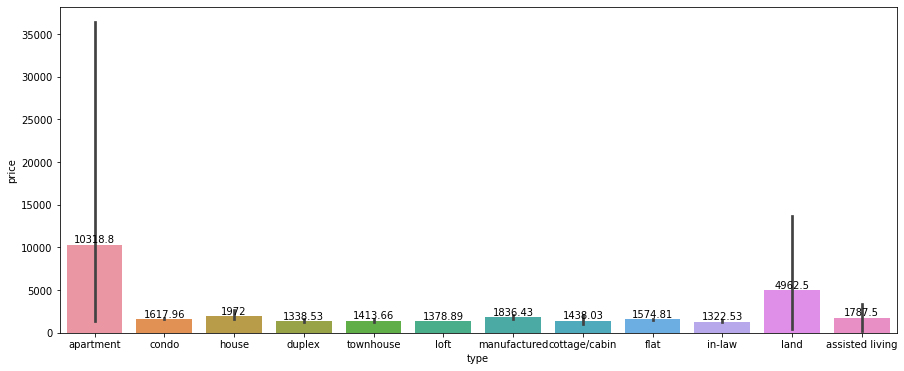

In [53]:
ax = sns.barplot(data['type'], data['price'])
for i in ax.containers:
    ax.bar_label(i,)

**Inference:**

* The price of apartment is highest compared to other type of houses.
* The average price of apartment is 10318 dollars
* Except the apartment and land prices, the average price of remaining house types are similar.

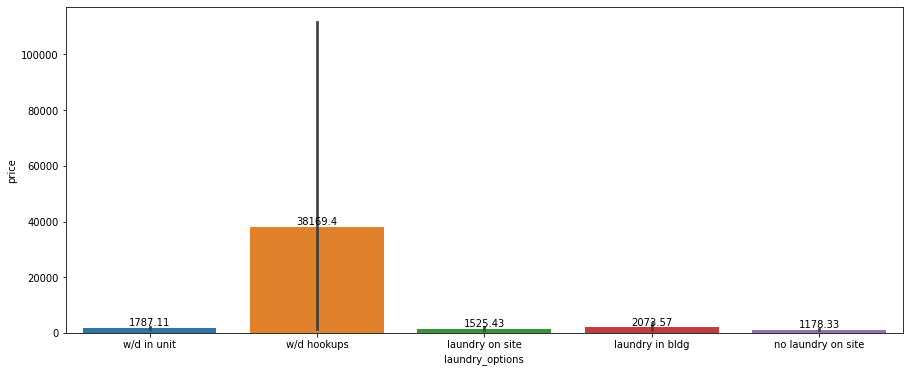

In [54]:
ax = sns.barplot(x='laundry_options', y='price', data=data)
for i in ax.containers:
    ax.bar_label(i,)

**Inference:**

* The houses having 'w/d hookups'(there is everything needed to hook up the washer and dryer to) is having highest average price.
* If there is no laundry on site, the average price is comparitively low.
* The average price for w/d hookups is 38169 dollars.

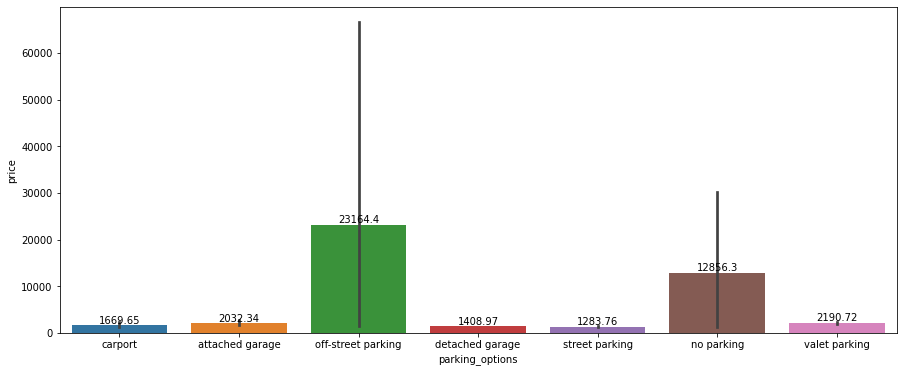

In [55]:
ax = sns.barplot(data['parking_options'], data['price'])
for i in ax.containers:
    ax.bar_label(i,)

**Inference:**

* The houses having "Off-Street parking" facility has highest average price.
* The average price of house with Off-Street parking facility is 23164 dollars.
* Eventhough there is no parking the prices are still high.

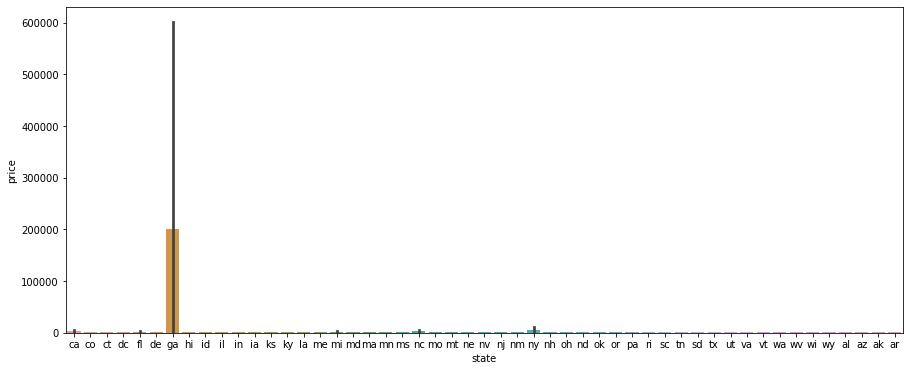

In [56]:
ax = sns.barplot(data['state'], data['price'])   
plt.show()

In [57]:
data.groupby(data['state']=='ga')['price'].mean()

state
False      1660.532376
True     200954.898996
Name: price, dtype: float64

**Inference:**

The average price of house is costier in ga(georgia state)

### Categorical (boolean) vs Numerical

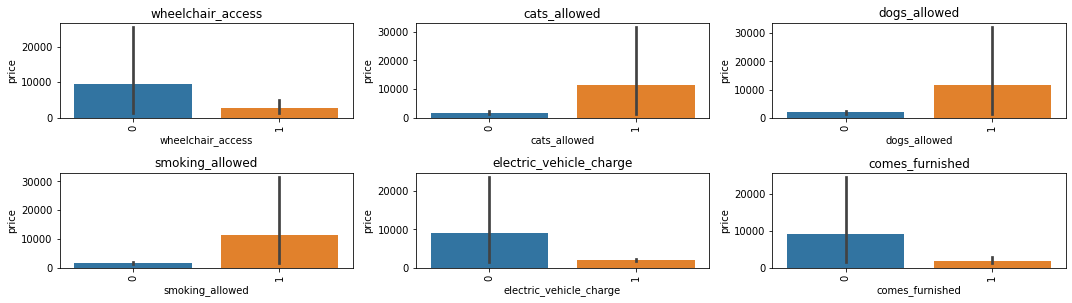

In [58]:
cols = ['wheelchair_access','cats_allowed','dogs_allowed','smoking_allowed', 'electric_vehicle_charge','comes_furnished']

rows =3
columns =3
iterator =1

for i in cols:
    plt.subplot(rows, columns, iterator)
    sns.barplot(data.loc[:, i], data['price'])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

**Inference:**
    
* From this we can infer that, when cats are allowed the house rental price is high.
* From this we can infer that, when dogs are allowed the house rental price is high.
* From this we can infer that, when smoking is allowed the house rental price is high.
* From this we can infer that, even when there is no wheel chair access house rental price is high.
* From this we can infer that, when there is no electric vehicle charging facility the average price is high.
* From this we can infer that, if house comes furnished the average price is low and if the house is not furnished the house rental price is high.

In [ ]:
sns.barplot(df['parking_options'],df['sqfeet'])

## Multivariate analysis

<AxesSubplot: >

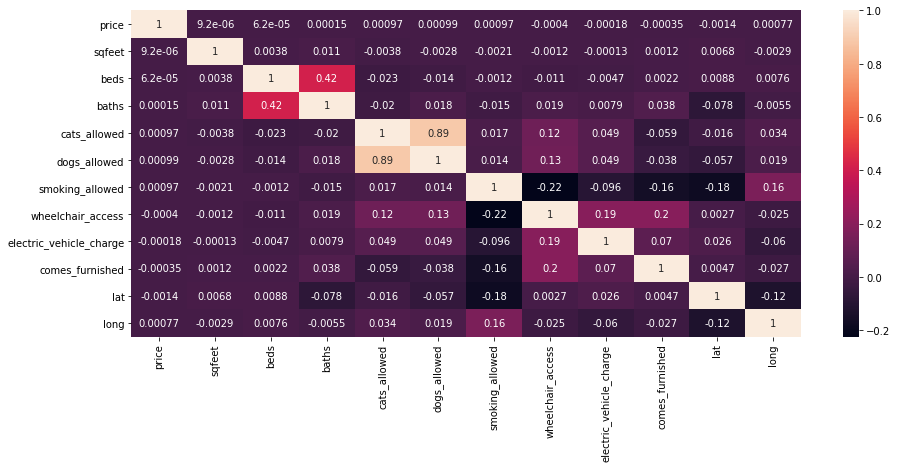

In [59]:
sns.heatmap(data.corr(), annot=True)

**Inference**

* cats_allowed and dogs_allowed are highly positively correlated to each other
* beds and baths are also correlated to each other

## Missing Value Treatment

In [13]:
(data.isnull().sum()/data.shape[0])*100

region                      0.000000
price                       0.000000
type                        0.000000
sqfeet                      0.000000
beds                        0.000000
baths                       0.000000
cats_allowed                0.000000
dogs_allowed                0.000000
smoking_allowed             0.000000
wheelchair_access           0.000000
electric_vehicle_charge     0.000000
comes_furnished             0.000000
laundry_options            20.527460
parking_options            36.544261
lat                         0.498212
long                        0.498212
state                       0.000000
dtype: float64

**Inference**
* There are **20%** missing values in **laundry options**
* **36.5%** missing values in **parking options**
* **0.5%** missing values in **latitude** and **longitude**

## Checking Outliers

<AxesSubplot: >

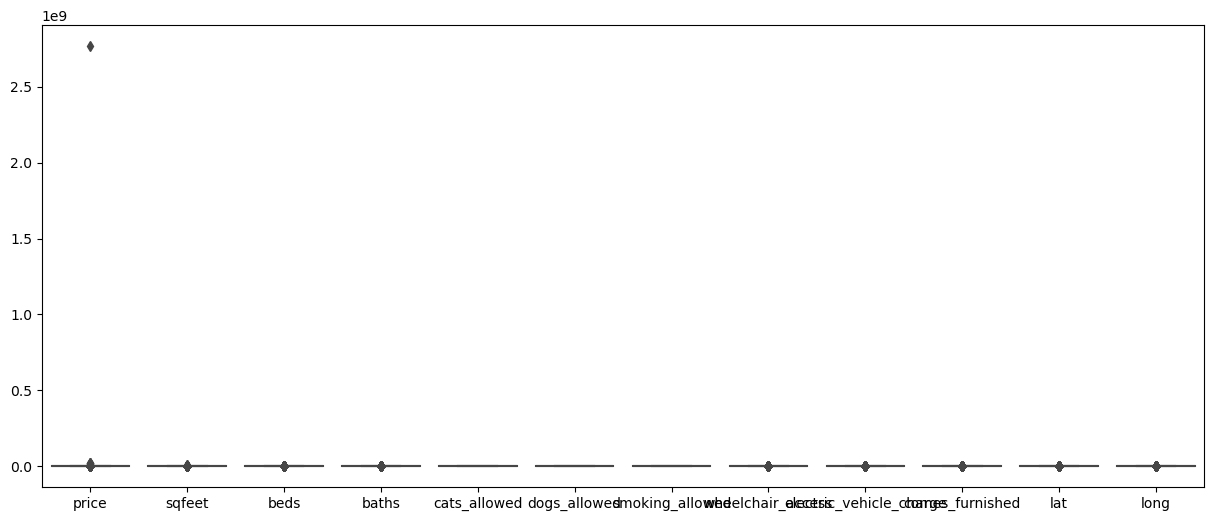

In [14]:
sns.boxplot(data=data)

**Inference**
* We can see that price has an extreme outlier which is more than 2.5 Billiion dollars
* And other features also have outliers

## Outlier Removal

**Inference**
* From the above graph we can see that there noise in some features.
* Therefore we will use 3*iqr so that we will remove extreme outliers like noise rather than the pattern

In [69]:
check = data[['price','sqfeet','beds','baths']]

q1 = check.quantile(0.25)
q3 = check.quantile(0.75)
iqr = q3 - q1

ll = q1 - 3*iqr
ul = q3 + 3*iqr

df = data[~((check<ll)|(check>ul)).any(axis=1)]
df.shape

(376384, 17)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'price'),
  Text(2, 0, 'sqfeet'),
  Text(3, 0, 'beds'),
  Text(4, 0, 'baths'),
  Text(5, 0, 'cats_allowed'),
  Text(6, 0, 'dogs_allowed'),
  Text(7, 0, 'smoking_allowed'),
  Text(8, 0, 'wheelchair_access'),
  Text(9, 0, 'electric_vehicle_charge'),
  Text(10, 0, 'comes_furnished'),
  Text(11, 0, 'lat'),
  Text(12, 0, 'long')])

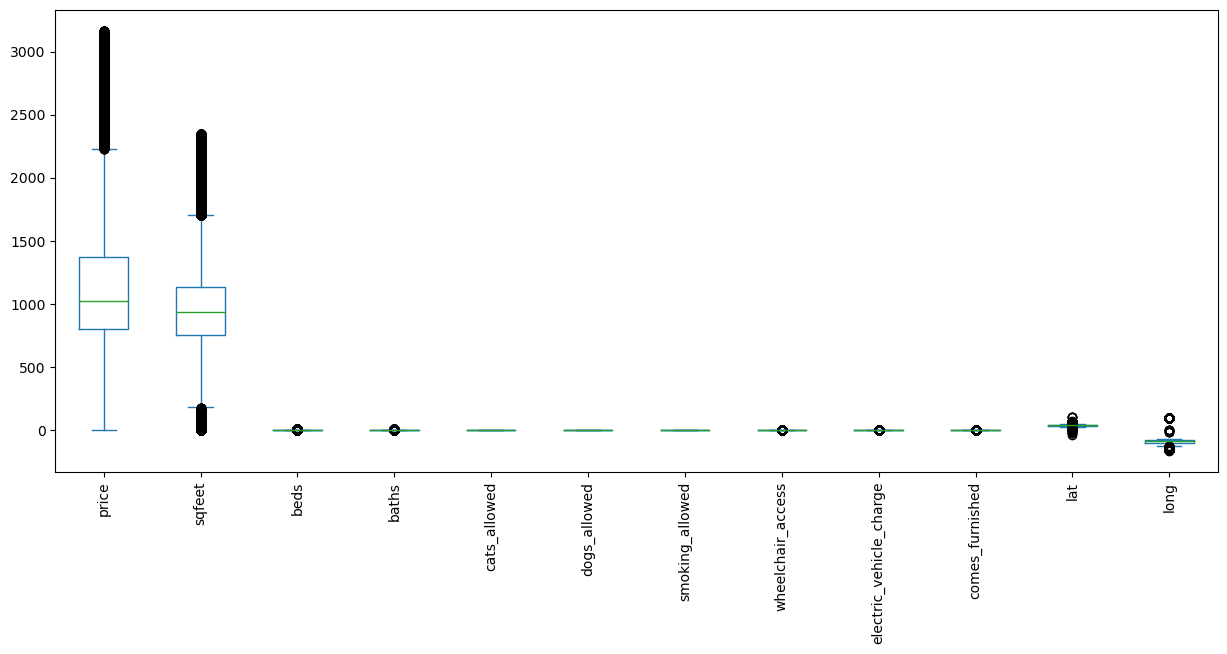

In [70]:
df.plot(kind='box')
plt.xticks(rotation=90)

**Inference**
* From the above graph we can see that noise has been removed but the pattern is still there.

## Treating the columns with values '0'

In [71]:
df = df[(df['price']>40)&(df['sqfeet']>40)]

In [72]:
df = df[(df['beds']>0)&(df['baths']>0)]

In [73]:
df.shape

(359886, 17)

In [74]:
df.duplicated().sum()

182243

## Encoding

In [75]:
df1 = df.copy()

In [22]:
import category_encoders

In [23]:
from category_encoders import TargetEncoder, OneHotEncoder

In [24]:
encoder = TargetEncoder(cols=['region','state','type'])

In [25]:
encoder.fit(df1, df1['price'])

TargetEncoder(cols=['region', 'state', 'type'])

In [26]:
df1 = encoder.transform(df1)

In [27]:
df1 = pd.get_dummies(data=df1, columns=['laundry_options','parking_options'],drop_first=True)

In [28]:
df1.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'lat', 'long', 'state',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_carport', 'parking_options_detached garage',
       'parking_options_no parking', 'parking_options_off-street parking',
       'parking_options_street parking', 'parking_options_valet parking'],
      dtype='object')

In [29]:
df1

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,...,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1382.691026,1148,1136.150399,1078,3,2.0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1382.691026,1200,1448.728443,1001,2,2.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1382.691026,1813,1136.150399,1683,2,2.0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1382.691026,1095,1136.150399,708,1,1.0,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0
5,1382.691026,1093,1136.150399,720,1,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,1382.691026,1295,1136.150399,957,2,2.0,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0
384973,1382.691026,1549,1136.150399,1034,2,2.0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
384974,1382.691026,1249,1136.150399,840,2,1.0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
384975,1382.691026,1429,1136.150399,976,2,2.0,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0


## Filling the null values with KNN Imputation

In [30]:
knn=KNNImputer().fit(df1)

df2=pd.DataFrame(knn.transform(df1),columns=df1.columns)

In [31]:
df2.isnull().sum()

region                                0
price                                 0
type                                  0
sqfeet                                0
beds                                  0
baths                                 0
cats_allowed                          0
dogs_allowed                          0
smoking_allowed                       0
wheelchair_access                     0
electric_vehicle_charge               0
comes_furnished                       0
lat                                   0
long                                  0
state                                 0
laundry_options_laundry on site       0
laundry_options_no laundry on site    0
laundry_options_w/d hookups           0
laundry_options_w/d in unit           0
parking_options_carport               0
parking_options_detached garage       0
parking_options_no parking            0
parking_options_off-street parking    0
parking_options_street parking        0
parking_options_valet parking         0


## Train Test Split

In [32]:
X = df2.drop('price',axis=1)
y = df2['price']
Xc = sm.add_constant(X)

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xc, y, test_size=0.3, random_state=42)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(251920, 25)
(107966, 25)
(251920,)
(107966,)


## Scaling

In [34]:
sc = StandardScaler()

In [35]:
num_cols = ['sqfeet','region','beds','baths','type','state']

Xtrain[num_cols] = sc.fit_transform(Xtrain[num_cols])
Xtest[num_cols] = sc.transform(Xtest[num_cols])

## Linear Model (Baseline Model)

In [36]:
base_model = sm.OLS(ytrain, Xtrain).fit()
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                 2.107e+04
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:02:26   Log-Likelihood:            -1.7712e+06
No. Observations:              251920   AIC:                         3.542e+06
Df Residuals:                  251895   BIC:                         3.543e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [37]:
ytrain_pred = base_model.predict(Xtrain)

In [38]:
ytest_pred = base_model.predict(Xtest)

In [39]:
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)
print('RMSE train:', np.sqrt(mse_train))
print('RMSE test:', np.sqrt(mse_test))
print()
mape_train = mean_absolute_percentage_error(ytrain, ytrain_pred)
mape_test = mean_absolute_percentage_error(ytest, ytest_pred)
print('MAPE train:', mape_train)
print('MAPE test:', mape_test)

RMSE train: 273.6060770462861
RMSE test: 273.4892383215942

MAPE train: 0.18491228422697614
MAPE test: 0.1858581518999759


## The linear regression algorithm assumes that there is a linear relationship between the parameters of independent variables and the dependent variable Y.

## So we'll check the assumptions to see whether it is linear or not

In [97]:
residuals = base_model.resid
residuals

309517   -227.615733
95975       2.563396
288352      2.982689
122954    -61.310175
51171    -234.092716
             ...    
119879   -153.448913
259178    170.289045
131932     -8.227641
146867    117.123490
121958    356.257831
Length: 251920, dtype: float64

### Residuals must be normally distributed

<AxesSubplot: ylabel='Density'>

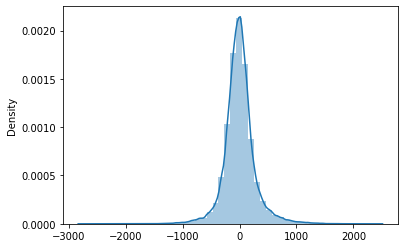

In [98]:
sns.distplot(residuals)

In [99]:
residuals.skew()

0.4526598071368704

**Inference**
* Residuals skewness is >0.5 so it is not normally distributed.
* It is slightly right skewed.

### Q-Q plot

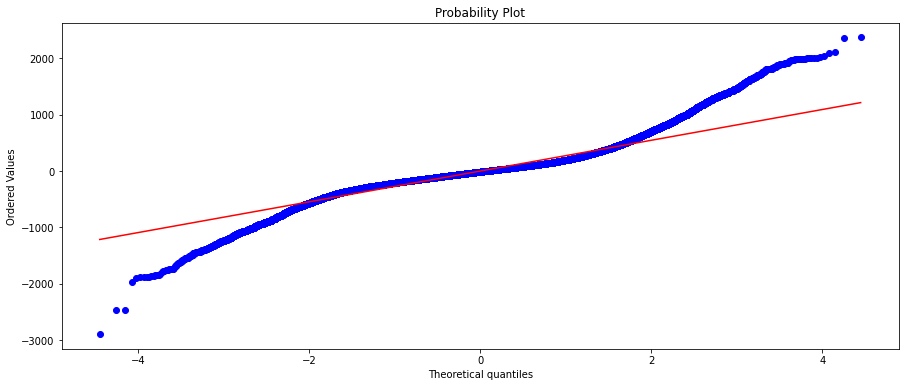

In [149]:
stats.probplot (residuals, plot=plt)
plt.show()

In [150]:
# Ho: Data is normal
# H1: Data is not normal

stats.jarque_bera(residuals)

Jarque_beraResult(statistic=225378.76104750237, pvalue=0.0)

In [151]:
# Data is not normal

**Inference**
* The Residual Quantiles don’t exactly follow the straight line like it should, which means that the distribution isn’t normal.

### Checking Linear relationship between independent and dependent variables

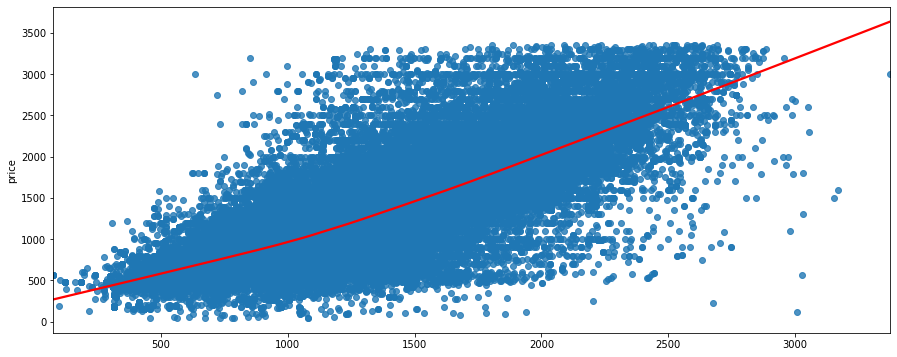

In [152]:
y_est = base_model.predict(Xtrain)
sns.regplot(x=y_est, y=ytrain, lowess=True, line_kws={'color':'red'})
plt.show()

In [153]:
# If the model is appropriate, we expect to see linear relationship between y and y_est.
# The figure shows that the relationship is not exactly linear; which suggest that model require improvement.

In [154]:
sm.stats.diagnostic.linear_rainbow(base_model)

(1.0189222822524986, 0.004092542854607437)

**Inference**
* Since prob(0.004) is less than 0.05, we will not accept the null hypothesis Ho to conclude that the model is not appropriate

### Autocorrelation (Durbin-Watson test)

In [155]:
from statsmodels.stats.stattools import durbin_watson

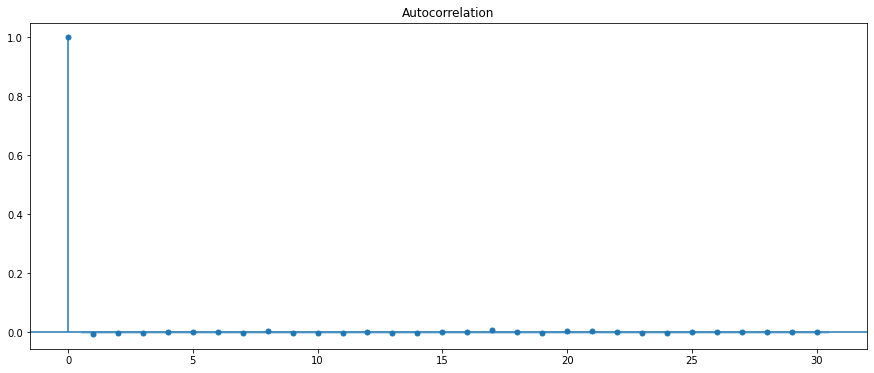

In [156]:
import statsmodels.tsa.api as smt
residuals = base_model.resid
smt.graphics.plot_acf(residuals, lags=30)
plt.show()

In [157]:
#Durbin-Watson value is 2.014
#Which implies there is no autocorrelation.

### Checking Homoskedasticity (constant variance)

<AxesSubplot: >

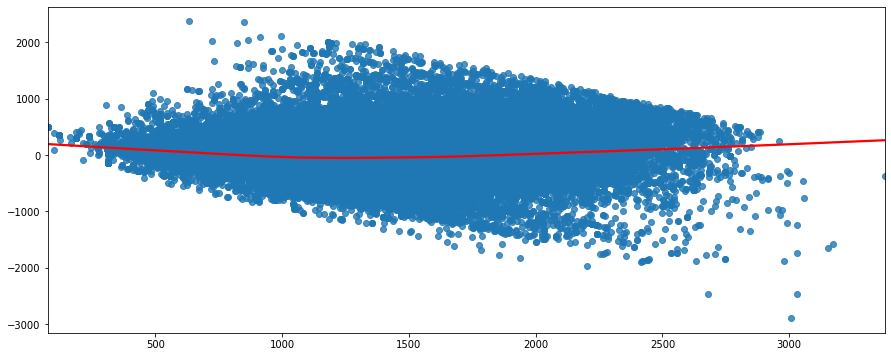

In [158]:
residuals = base_model.resid
y_pred = base_model.predict(Xtrain)
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})

In [159]:
# Change in variance of residuals are tested against the red line(overall trend)
# It shows some indication of increasing variance.

#### Goldfeld Quant test

In [160]:
# Ho: Variance of the residuals are constant
# H1: Variance of the residuals are not constant

In [161]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=residuals, x=Xtrain)

(0.9926189264113884, 0.8519886189497824, 'increasing')

In [162]:
# prob value >  0.05 which it accepts null hypothesis, variance of the residual are constant.
# The term 'increasing' indicates that the procedure is assuming increasing variance with y_pred.

**Inference**
* From the above Assumptions testing we can clearly everything is violated, so we will try to apply Non-linear model.

### Checking Multicollinearity

<AxesSubplot: >

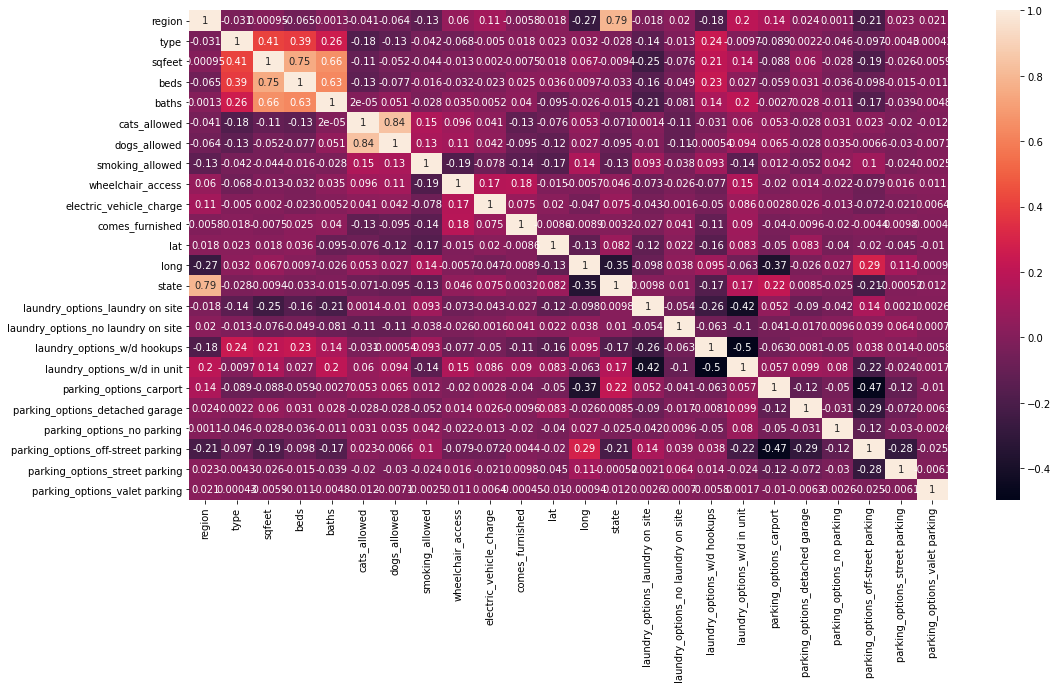

In [163]:
plt.figure(figsize=(17,9))
sns.heatmap(X.corr(),annot=True)

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [165]:
vif = [VIF(Xc.values,i) for i in range(Xc.shape[1])] 
pd.DataFrame(vif, index=Xc.columns, columns=['VIF'])

,VIF
const,149.352264
region,2.798759
type,1.324241
sqfeet,3.089503
beds,2.679342
baths,2.109421
cats_allowed,3.585086
dogs_allowed,3.561583
smoking_allowed,1.152343
wheelchair_access,1.141946


**Inference**
* VIF of features like dogs_allowed, cats_allowed are >3, which it those have a strong correlation between each other.
* Which is also visible in heatmap.

## Trying out Feature Engineering techniques to improve the model

In [92]:
df3 = df.copy()

In [93]:
df3['price_per_sqft'] = df3['price'] / df3['sqfeet']

In [94]:
df3['pets_allowed'] = (df3['cats_allowed'] | df3['dogs_allowed']).astype(int)

In [95]:
df3['bed_and_bath'] = df3['beds'] + df3['baths']

In [96]:
df3['amenities'] = (df3[['smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']].sum(axis=1) > 0).astype(int)

* ‘price_per_sqft’ which is ‘price’ divided by ‘sqft.
* ‘pets_allowed’ in which both cats or dogs are allowed.
* ‘bed_and_bath’ in count of total beds and baths.
* ‘amenities’ in which all the other features providing amenities like ‘smoking_allowed’ , ‘wheelchair_access’ , ‘electric_vehicle_charge’,  ‘comes_furnished’ etc are added. If any one is there it will show 1


## Statistical Analysis

In [45]:
from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats import wilcoxon
for i in df3.drop('price',axis=1).columns:
    if df3[i].dtypes=='object':
        stat,pval,a,b=chi2_contingency(pd.crosstab(df3[i],df3['price']),correction=False)
        print('the pvalue for',i,'is',pval)
        print('---------------------')
    else:
        stat, pval=wilcoxon(df3[i], df3['price'])
        print('the pvalue for',i,'is',pval)
        print('-----------------------')

the pvalue for region is 0.0
---------------------
the pvalue for type is 0.0
---------------------
the pvalue for sqfeet is 0.0
-----------------------
the pvalue for beds is 0.0
-----------------------
the pvalue for baths is 0.0
-----------------------
the pvalue for cats_allowed is 0.0
-----------------------
the pvalue for dogs_allowed is 0.0
-----------------------
the pvalue for smoking_allowed is 0.0
-----------------------
the pvalue for wheelchair_access is 0.0
-----------------------
the pvalue for electric_vehicle_charge is 0.0
-----------------------
the pvalue for comes_furnished is 0.0
-----------------------
the pvalue for laundry_options is 0.0
---------------------
the pvalue for parking_options is 0.0
---------------------
the pvalue for lat is nan
-----------------------
the pvalue for long is nan
-----------------------
the pvalue for state is 0.0
---------------------
the pvalue for price_per_sqft is 0.0
-----------------------
the pvalue for pets_allowed is 0.0
-

## Encoding the data 

In [46]:
encoder = TargetEncoder(cols=['region','state','type'])

In [47]:
encoder.fit(df3, df3['price'])

TargetEncoder(cols=['region', 'state', 'type'])

In [48]:
df3 = encoder.transform(df3)

In [49]:
df3 = pd.get_dummies(data=df3, columns=['laundry_options','parking_options'],drop_first=True)

## Filling the null values with KNN Imputation

In [50]:
knn=KNNImputer().fit(df3)

df4=pd.DataFrame(knn.transform(df3),columns=df3.columns)

In [51]:
X1 = df4.drop('price',axis=1)
y1 = df4['price']

In [52]:
df4.shape

(359886, 29)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(251920, 28)
(107966, 28)
(251920,)
(107966,)


## Single code for all regression model

In [54]:
from sklearn.datasets import make_regression

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(),
          GradientBoostingRegressor(),XGBRegressor()]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest','AdaBoost','Gradient','XGBoost']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=2)

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_train_pred,squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred,squared=False)
    r2 = r2_score(y_test,y_test_pred)
    
    print(f'{name} RMSE Train: {rmse_train:.4f}')
    print(f'{name} RMSE Test: {rmse_test:.4f}')
    print(f'{name} R square: {r2:.4f}')
    print()
    print('-----------------------------------------------------------------------')

Linear Regression RMSE Train: 245.3583
Linear Regression RMSE Test: 244.4650
Linear Regression R square: 0.7342

-----------------------------------------------------------------------
Decision Tree RMSE Train: 0.0000
Decision Tree RMSE Test: 18.4677
Decision Tree R square: 0.9985

-----------------------------------------------------------------------
Random Forest RMSE Train: 4.4714
Random Forest RMSE Test: 11.2548
Random Forest R square: 0.9994

-----------------------------------------------------------------------
AdaBoost RMSE Train: 234.2153
AdaBoost RMSE Test: 235.2789
AdaBoost R square: 0.7538

-----------------------------------------------------------------------
Gradient RMSE Train: 36.1209
Gradient RMSE Test: 37.4288
Gradient R square: 0.9938

-----------------------------------------------------------------------
XGBoost RMSE Train: 16.5776
XGBoost RMSE Test: 18.2224
XGBoost R square: 0.9985

-----------------------------------------------------------------------


**Inference**

* We can see that the R2 score of LinearRegression becomes 0.734 which is a good improvement
* And the non-linear Models like Random forest and Xgboost are working really well.
* But XGBoost is the one which gives low variance error of 1.7 and also a good R2 score of 99.86%.
* We'll try to tune the XGBoost and check whether we can reduce the error further or not 

## Using RandomizedSearchCV for XGBoost

In [55]:
kf = KFold(n_splits=5, shuffle=True, random_state=2)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': np.arange(50, 200, 50), 'learning_rate': [0.1, 0.01, 0.001]}

random_search = RandomizedSearchCV(models[-1], param_grid, n_iter=10, cv=kf, scoring='neg_mean_squared_error')

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 150, 'learning_rate': 0.1}
Best score: -256.7593792819601


In [57]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
XG2 = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2)
XGBoost2 = XG2.fit(X_train, y_train)

In [59]:
y_train_xg_tune = XGBoost2.predict(X_train)
y_test_xg_tune = XGBoost2.predict(X_test)

In [60]:
mse_train = mean_squared_error(y_train, y_train_xg_tune)
mse_test = mean_squared_error(y_test, y_test_xg_tune)
print('RMSE train:', np.sqrt(mse_train))
print('RMSE test:', np.sqrt(mse_test))
print()
mape_train = mean_absolute_percentage_error(y_train, y_train_xg_tune)
mape_test = mean_absolute_percentage_error(y_test, y_test_xg_tune)
print('MAPE train:', mape_train)
print('MAPE test:', mape_test)

RMSE train: 14.517836727518413
RMSE test: 15.685548161851266

MAPE train: 0.009058225378409243
MAPE test: 0.009373466702595102


In [61]:
print(r2_score(y_test,y_test_xg_tune))

0.9989055935965095


**Inference**

* After tuning we are getting 99.89% as our R2 score
* Our Variance error also decreased to 1.3
* We'll finalize this model for deplpoyment

## Deployment

In [97]:
df3.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'price_per_sqft',
       'pets_allowed', 'bed_and_bath', 'amenities'],
      dtype='object')

In [76]:
cat_cols=df.select_dtypes(object).columns
cat_cols

Index(['region', 'type', 'laundry_options', 'parking_options', 'state'], dtype='object')

In [98]:
X = df3.drop('price',axis=1)
y = df3['price']

In [99]:
X.columns

Index(['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'price_per_sqft',
       'pets_allowed', 'bed_and_bath', 'amenities'],
      dtype='object')

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [101]:
ohe = OneHotEncoder()
ohe.fit(X[['region', 'type', 'laundry_options', 'parking_options', 'state']])

OneHotEncoder()

In [102]:
ohe.categories_

[array(['SF bay area', 'abilene', 'akron / canton', 'albany',
        'albuquerque', 'altoona-johnstown', 'amarillo', 'ames',
        'anchorage / mat-su', 'ann arbor', 'annapolis',
        'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens',
        'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield',
        'baltimore', 'baton rouge', 'battle creek',
        'beaumont / port arthur', 'bellingham', 'bemidji', 'bend',
        'billings', 'binghamton', 'birmingham', 'bismarck', 'bloomington',
        'bloomington-normal', 'boise', 'boone', 'boston', 'boulder',
        'bowling green', 'bozeman', 'brainerd', 'brownsville', 'brunswick',
        'buffalo', 'butte', 'cape cod / islands', 'catskills',
        'cedar rapids', 'central NJ', 'central louisiana',
        'central michigan', 'champaign urbana', 'charleston', 'charlotte',
        'charlottesville', 'chattanooga', 'chautauqua', 'chicago', 'chico',
        'chillicothe', 'cincinnati', 'clarksville', 'cleveland',
        

In [103]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['region', 'type', 'laundry_options', 'parking_options', 'state']),remainder='passthrough')

In [104]:
pipe = make_pipeline(column_trans,XGBRegressor())

In [105]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['SF bay area', 'abilene', 'akron / canton', 'albany',
       'albuquerque', 'altoona-johnstown', 'amarillo', 'ames',
       'anchorage / mat-su', 'ann arbor', 'annapolis',
       'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens',
       'atlanta', '...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [115]:
r2 = r2_score(y,pipe.predict(X))

In [116]:
r2

0.999211572109944

In [106]:
import pickle
model = open('project.pickle','wb')
pickle.dump(pipe,model)
model.close()

In [107]:
df=df.dropna()

In [108]:
for i in df.columns:
    print(i,df[i].unique())

region ['reno / tahoe' 'sacramento' 'boulder' 'visalia-tulare' 'santa barbara'
 'SF bay area' 'siskiyou county' 'ventura county' 'san diego'
 'san luis obispo' 'santa maria' 'stockton' 'susanville'
 'colorado springs' 'yuba-sutter' 'denver' 'fort collins / north CO'
 'western slope' 'hartford' 'new haven' 'washington, DC' 'pueblo'
 'eastern CT' 'ft myers / SW florida' 'high rockies' 'jacksonville'
 'ocala' 'daytona beach' 'eastern CO' 'northwest CT' 'lakeland' 'delaware'
 'florida keys' 'north central FL' 'gainesville' 'heartland florida'
 'orlando' 'panama city' 'pensacola' 'south florida' 'okaloosa / walton'
 'space coast' 'tallahassee' 'sarasota-bradenton' 'tampa bay area'
 'atlanta' 'augusta' 'brunswick' 'athens' 'albany' 'treasure coast'
 'st augustine' 'macon / warner robins' 'columbus' 'northwest GA'
 'savannah / hinesville' 'hawaii' 'statesboro' 'boise' 'valdosta'
 "spokane / coeur d'alene" 'bloomington-normal' 'chicago' 'twin falls'
 'decatur' 'la salle co' 'quad cities, IA/IL

In [109]:
df.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site',
       'no laundry on site', 'laundry in bldg'], dtype=object)

In [112]:
%%writefile model.py
import streamlit as st
import pandas as pd
st.title('House Price Prediction Web Application')
import pickle 

# Step 1: load the pickled model
model = open('project.pickle','rb')
project=pickle.load(model)
model.close()

# Step 2: create a UI for front end user
state = st.sidebar.selectbox('State',['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'])
region=st.sidebar.selectbox('Region',('reno / tahoe', 'sacramento', 'boulder', 'visalia-tulare',
       'santa barbara', 'SF bay area', 'siskiyou county',
       'ventura county', 'san diego', 'san luis obispo', 'stockton',
       'santa maria', 'susanville', 'colorado springs', 'yuba-sutter',
       'denver', 'northwest CT', 'fort collins / north CO',
       'western slope', 'eastern CT', 'hartford', 'new haven',
       'washington, DC', 'high rockies', 'pueblo', 'daytona beach',
       'ft myers / SW florida', 'gainesville', 'jacksonville', 'ocala',
       'eastern CO', 'heartland florida', 'delaware', 'lakeland',
       'florida keys', 'north central FL', 'orlando', 'panama city',
       'pensacola', 'sarasota-bradenton', 'south florida',
       'okaloosa / walton', 'space coast', 'tallahassee',
       'tampa bay area', 'atlanta', 'augusta', 'brunswick', 'athens',
       'treasure coast', 'albany', 'st augustine',
       'macon / warner robins', 'columbus', 'northwest GA',
       'savannah / hinesville', 'hawaii', 'boise', 'east idaho',
       'statesboro', "spokane / coeur d'alene", 'valdosta',
       'bloomington-normal', 'champaign urbana', 'chicago', 'twin falls',
       'decatur', 'la salle co', 'quad cities, IA/IL', 'st louis, MO',
       'peoria', 'evansville', 'springfield', 'bloomington',
       'lewiston / clarkston', 'pullman / moscow', 'indianapolis',
       'fort wayne', 'rockford', 'south bend / michiana', 'ames',
       'richmond', 'southern illinois', 'mattoon-charleston',
       'muncie / anderson', 'western IL', 'lafayette / west lafayette',
       'kokomo', 'terre haute', 'cedar rapids', 'des moines',
       'omaha / council bluffs', 'wichita', 'fort dodge', 'lawrence',
       'salina', 'sioux city', 'bowling green', 'lexington',
       'eastern kentucky', 'iowa city', 'louisville', 'dubuque',
       'baton rouge', 'waterloo / cedar falls', 'manhattan', 'western KY',
       'topeka', 'lafayette', 'monroe', 'mason city', 'new orleans',
       'kansas city, MO', 'southeast IA', 'lake charles', 'southeast KS',
       'huntington-ashland', 'northwest KS', 'southwest KS', 'shreveport',
       'central louisiana', 'houma', 'owensboro', 'maine', 'lansing',
       'annapolis', 'baltimore', 'frederick', 'southern maryland',
       'boston', 'south coast', 'western massachusetts',
       'worcester / central MA', 'western maryland', 'ann arbor',
       'battle creek', 'detroit metro', 'holland', 'cumberland valley',
       'flint', 'kalamazoo', 'muskegon', 'saginaw-midland-baycity',
       'upper peninsula', 'eastern shore', 'cape cod / islands',
       'grand rapids', 'bemidji', 'central michigan', 'northern michigan',
       'jackson', 'southwest michigan', 'the thumb', 'port huron',
       'brainerd', 'duluth / superior', 'fargo / moorhead',
       'minneapolis / st paul', 'rochester', 'gulfport / biloxi',
       'st cloud', 'hattiesburg', 'asheville', 'north mississippi',
       'joplin', 'kirksville', 'mankato', 'southwest MS',
       'columbia / jeff city', 'southwest MN', 'st joseph', 'charlotte',
       'boone', 'billings', 'missoula', 'fayetteville', 'eastern NC',
       'greensboro', 'raleigh / durham / CH', 'hickory / lenoir',
       'lake of the ozarks', 'meridian', 'southeast missouri',
       'kansas city', 'st louis', 'bozeman', 'eastern montana',
       'kalispell', 'great falls', 'helena', 'butte', 'outer banks',
       'wilmington', 'winston-salem', 'lincoln', 'las vegas',
       'north platte', 'central NJ', 'north jersey', 'jersey shore',
       'south jersey', 'albuquerque', 'buffalo', 'ithaca', 'farmington',
       'long island', 'hudson valley', 'syracuse',
       'plattsburgh-adirondacks', 'catskills', 'watertown',
       'grand island', 'santa fe / taos', 'scottsbluff / panhandle',
       'new york city', 'binghamton', 'utica-rome-oneida',
       'new hampshire', 'elko', 'clovis / portales', 'finger lakes',
       'chautauqua', 'elmira-corning', 'las cruces', 'roswell / carlsbad',
       'glens falls', 'potsdam-canton-massena', 'oneonta',
       'twin tiers NY/PA', 'cincinnati', 'north dakota', 'akron / canton',
       'bismarck', 'grand forks', 'dayton / springfield', 'cleveland',
       'lima / findlay', 'toledo', 'northern panhandle', 'oklahoma city',
       'zanesville / cambridge', 'ashtabula', 'lawton', 'chillicothe',
       'texoma', 'tulsa', 'bend', 'corvallis/albany', 'tuscarawas co',
       'east oregon', 'eugene', 'medford-ashland', 'oregon coast',
       'portland', 'mansfield', 'stillwater', 'parkersburg-marietta',
       'northwest OK', 'sandusky', 'youngstown', 'fort smith, AR',
       'klamath falls', 'salem', 'roseburg', 'harrisburg', 'philadelphia',
       'erie', 'pittsburgh', 'lehigh valley', 'rhode island',
       'scranton / wilkes-barre', 'altoona-johnstown', 'reading',
       'charleston', 'williamsport', 'lancaster', 'state college',
       'columbia', 'greenville / upstate', 'myrtle beach', 'hilton head',
       'chattanooga', 'poconos', 'clarksville', 'meadville',
       'south dakota', 'cookeville', 'york', 'sioux falls / SE SD',
       'florence', 'northeast SD', 'rapid city / west SD',
       'pierre / central SD', 'knoxville', 'memphis', 'nashville',
       'amarillo', 'austin', 'college station', 'lubbock',
       'dallas / fort worth', 'abilene', 'el paso', 'corpus christi',
       'del rio / eagle pass', 'galveston', 'houston',
       'killeen / temple / ft hood', 'laredo', 'mcallen / edinburg',
       'tri-cities', 'brownsville', 'beaumont / port arthur',
       'deep east texas', 'odessa / midland', 'waco', 'san antonio',
       'san angelo', 'san marcos', 'tyler / east TX', 'victoria',
       'wichita falls', 'provo / orem', 'ogden-clearfield',
       'salt lake city', 'fredericksburg', 'charlottesville', 'lynchburg',
       'norfolk / hampton roads', 'roanoke', 'winchester', 'texarkana',
       'southwest TX', 'vermont', 'logan', 'st george', 'danville',
       'harrisonburg', 'new river valley', 'southwest VA', 'bellingham',
       'kennewick-pasco-richland', 'seattle-tacoma', 'moses lake',
       'olympic peninsula', 'yakima', 'morgantown', 'madison',
       'wenatchee', 'skagit / island / SJI', 'milwaukee',
       'west virginia (old)', 'wausau', 'janesville', 'kenosha-racine',
       'eastern panhandle', 'southern WV', 'green bay', 'la crosse',
       'wyoming', 'appleton-oshkosh-FDL', 'eau claire', 'sheboygan',
       'northern WI', 'auburn', 'birmingham', 'phoenix',
       'gadsden-anniston', 'huntsville / decatur', 'dothan', 'mobile',
       'montgomery', 'florence / muscle shoals', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'flagstaff / sedona', 'tucson',
       'little rock', 'prescott', 'yuma', 'bakersfield',
       'fresno / madera', 'hanford-corcoran', 'humboldt county',
       'inland empire', 'los angeles', 'kenai peninsula',
       'southeast alaska', 'mohave county', 'fort smith', 'jonesboro',
       'show low', 'gold country', 'sierra vista', 'chico',
       'imperial county', 'modesto', 'orange county', 'mendocino county',
       'merced', 'palm springs', 'monterey bay', 'redding'))
sqfeet = st.sidebar.slider('Size of the house you are looking for (in sqfeet)',40,3000,25)
beds=st.sidebar.slider('Select number of beds you want',1,100,1)
baths=st.sidebar.slider('Select number of baths you want',1,100,1)
Type=st.sidebar.selectbox('Select the type of the house',['apartment', 'condo', 'house', 'duplex', 'townhouse', 'loft',
       'manufactured', 'cottage/cabin', 'flat', 'in-law', 'land',
       'assisted living'])
lat = st.sidebar.slider('Latitude of the house location you prefer',-50,120,2)
long = st.sidebar.slider('Longitude of the house location you prefer',-200,100,2)
pets_allowed = st.sidebar.radio('You have pets? (1-Yes/ 0-No)',(1,0))
price_per_sqft = st.sidebar.slider('Select the price preference per sqft',0,100,1)
amenities = st.sidebar.radio('Do you prefer any amenities? (1-Yes/ 0-No)',(1,0))
bed_and_bath = st.sidebar.slider('Select the number of beda and bath you want',2,50,1)
parking_options = st.sidebar.radio('Parking type',('carport' ,'attached garage','off-street parking', 'detached garage',
 'street parking', 'no parking' ,'valet parking'))
laundry = st.sidebar.radio('Select Laundry type',('w/d in unit', 'w/d hookups', 'laundry in bldg', 'laundry on site','no laundry on site'))
cats_allowed=st.sidebar.radio('You have cat? (1-Yes/ 0-No)',(1,0))
dogs_allowed= st.sidebar.radio('You have dog? (1-Yes/ 0-No)',(1,0))
smoking=st.sidebar.radio('You want a house where smoking is allowed? (1-Yes/ 0-No)',(1,0))
wheelchair=st.sidebar.radio('Whether you want a house with wheelchair access facility? (1-Yes/ 0-No)',(1,0))
electric_vehicle=st.sidebar.radio('Whether you want a electric vehicle charging facility? (1-Yes/ 0-No)',(1,0))
furnished=st.sidebar.radio('Whether you want a furnished house? (1-Yes/ 0-No)',(1,0))
# Step 3: Change user input as models input data
data={
    'state':state,
    'region':region,
    'sqfeet':sqfeet,
    'beds':beds,
    'baths':baths,
    'type':Type,
    'lat':lat,
    'long':long,
    'pets_allowed':pets_allowed,
    'price_per_sqft':price_per_sqft,
    'bed_and_bath':bed_and_bath,
    'amenities':amenities,
    'parking_options':parking_options,
    'laundry_options':laundry,
    'cats_allowed':cats_allowed,
    'dogs_allowed':dogs_allowed,
    'smoking_allowed':smoking,
    'wheelchair_access':wheelchair,
    'electric_vehicle_charge':electric_vehicle,
    'comes_furnished':furnished

}
input_data = pd.DataFrame([data])

# Step 4: get the prediction and print result
predictions = project.predict(input_data)[0]
if st.sidebar.button('Predict'):
    st.write('The price is {} USD'.format(predictions))

Overwriting model.py
